In [1]:
# import library and read the file

import numpy as np
import pandas as pd

df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2


In [3]:
# make x and y for linear regression

x_train = df.YearsExperience.to_numpy()
y_train = df.Salary.to_numpy()

## Make a Scatter Plot based on the actual data values

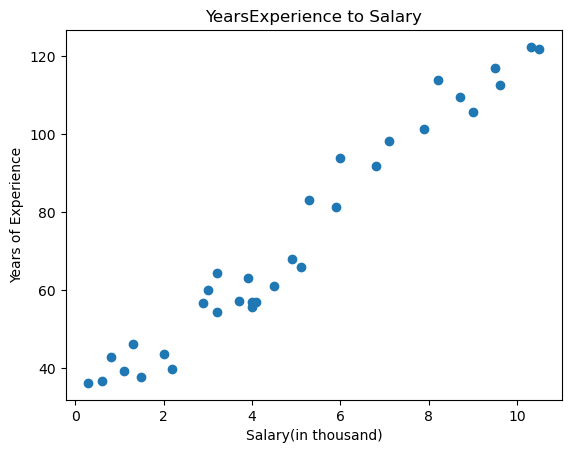

In [4]:
# scatter the variable x and y as graph 

import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)
plt.title('YearsExperience to Salary')
plt.xlabel('Salary(in thousand)')
plt.ylabel('Years of Experience')
plt.show()

## Make a plot graph
we will make a function to plot a best prediction line on top of the scatter graph based on the parameter w & b that we define in the function. 

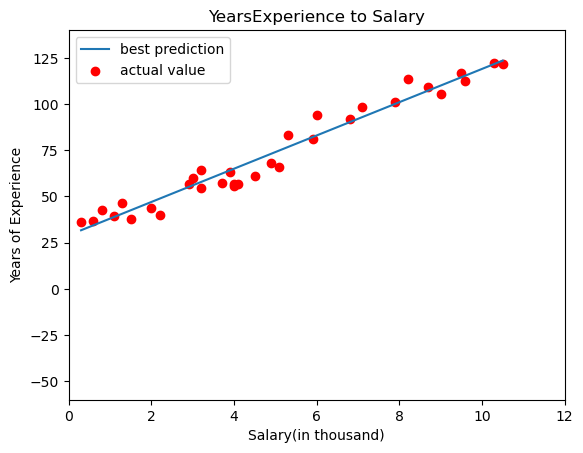

In [83]:
# plot the graph based on assumption on w & b to find the best line

# function that return an array of Y prediction value
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w, b (scalar): model parameters  
    Returns:
      f_wb (ndarray (m,)): model prediction
    """
    return w * x + b

def plot_pred(x, y, w, b):
    #store the prediction of ^y value in an array 
    f_wb = compute_model_output(x, w, b)
    
    #plot the model prediction based on our parameter w & b
    plt.plot(x, f_wb, label='best prediction')
    #plot the actual data point 
    plt.scatter(x, y, label='actual value', c='r')
    #set the title, x and y label and legend
    plt.title('YearsExperience to Salary')
    plt.xlabel('Salary(in thousand)')
    plt.ylabel('Years of Experience') 
    plt.xlim([0,12])
    plt.ylim([-60,140])
    plt.legend()
    plt.show()

plot_pred(x_train, y_train,9 ,29)

## Make an interactive graph
We will make an interactive graph with slider for both parameter w and b to show the prediction line. 

In [7]:
from ipywidgets import interact

# make an interactive chart to see w and b combination as parameter to find the best prediction line
interact(lambda w, b: plot_pred(x_train, y_train, w, b), w=(-100,100,1), b=(-100,100,1))

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.<lambda>(w, b)>

## Calculate the cost function when w is changing but b is constant

In [41]:
#calculate cost function

def cost(x, y, w, b):
    f_wb = compute_model_output(x, w, b)
    total_cost = (y - f_wb)**2
    return total_cost.sum() / (2 * len(x))

#check the cost value when w parameter is between -100 to 100, assumpted that b is a constant 0
costs = []
w_list = list(range(-100,101))
for i in w_list:
    current_cost = cost(x_train, y_train, i, 0)
    costs.append(current_cost)

# check the costs amount
#costs

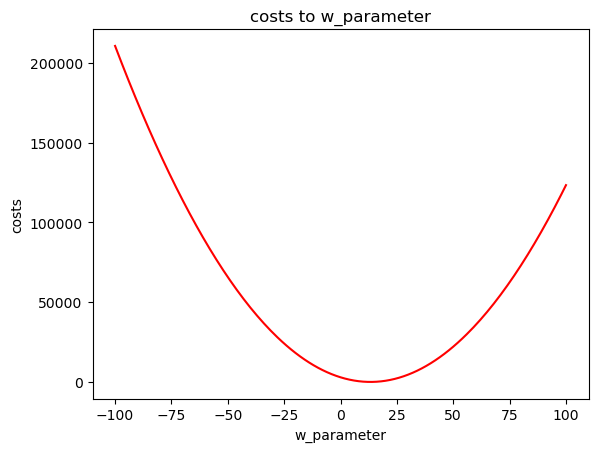

In [42]:
# plot the graph of cost per different w parameter between -100 to 100
plt.plot(w_list, costs, color='red')
plt.title('costs to w_parameter')
plt.xlabel('w_parameter')
plt.ylabel('costs')
plt.show()

## Plot the 3d graph when w and b both changing between -100 to 100

In [60]:
# set an array from -100 to 100 for both parameter w and b
ws = np.arange(-100,101)
bs = np.arange(-100,101)
# Set a 2D array to capture the full combination of w & b
total_costs = np.zeros((len(ws), len(bs)))

# Use a nested loop to put all cost values with different combinations into the 2D array
for i, w in enumerate(ws):
    for j, b in enumerate(bs):
        current_cost = cost(x_train, y_train, w, b)
        total_costs[i, j] = current_cost

total_costs

array([[271548.87393939, 270888.64060606, 270229.40727273, ...,
        160325.67393939, 159863.44060606, 159402.20727273],
       [267363.75469697, 266708.40318182, 266054.05166667, ...,
        157107.15469697, 156649.80318182, 156193.45166667],
       [263211.41090909, 262560.94121212, 261911.47151515, ...,
        153921.41090909, 153468.94121212, 153017.47151515],
       ...,
       [ 82114.95393939,  82421.32060606,  82728.68727273, ...,
        162278.55393939, 162782.92060606, 163288.28727273],
       [ 84419.37469697,  84730.62318182,  85042.87166667, ...,
        165549.57469697, 166058.82318182, 166569.07166667],
       [ 86756.57090909,  87072.70121212,  87389.83151515, ...,
        168853.37090909, 169367.50121212, 169882.63151515]])

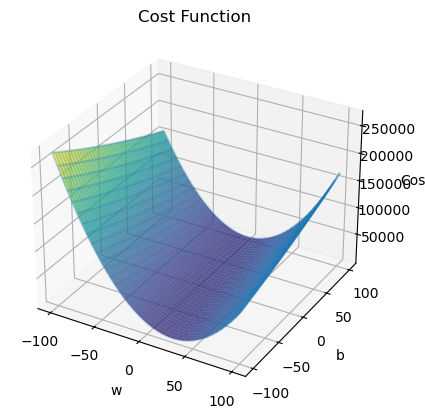

In [81]:
# Plot the 3D graph
b_grid, w_grid = np.meshgrid(bs, ws)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_grid, b_grid, total_costs, cmap='viridis', alpha=0.7)
ax.plot_wireframe(w_grid, b_grid, total_costs, alpha=0.3)

ax.set_title('Cost Function')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')


plt.show()

In [82]:
# find the w & b parameters when total cost is the mininum 
w_index, b_index = np.where(total_costs == np.min(total_costs))
print(f"when w = {ws[w_index]}, b = {bs[b_index]}, the minimum cost = {total_costs[w_index, b_index]}")

when w = [9], b = [29], the minimum cost = [16.34742424]


## Gradient Descent to find the minimum cost